## CV Final Project: Interest Point Detector + Descriptor using SURF
Aja Klevs + Micaela Flores

In [39]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import time
import scipy
from PIL import Image
import math
import scipy.misc
from scipy.ndimage.interpolation import zoom
import pywt

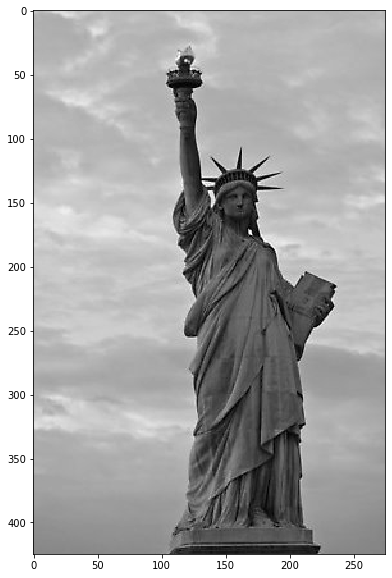

In [2]:
plt.rcParams['image.cmap'] = 'gray'  

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

name = 'lady_liberty1.jpeg'
lady = plt.imread(name)
lady = lady[25:450, 25:300]
plt.figure(figsize=(10,10)) # this allows you to control the size of the displayed image
plt.imshow(lady)

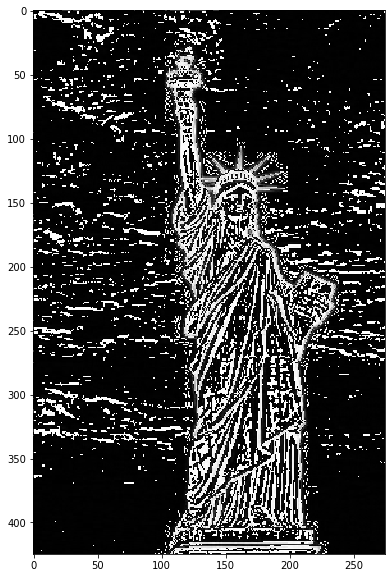

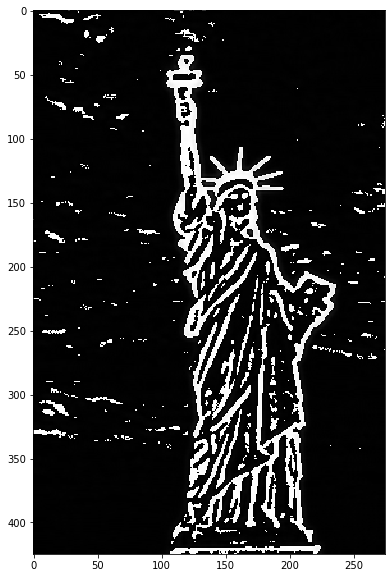

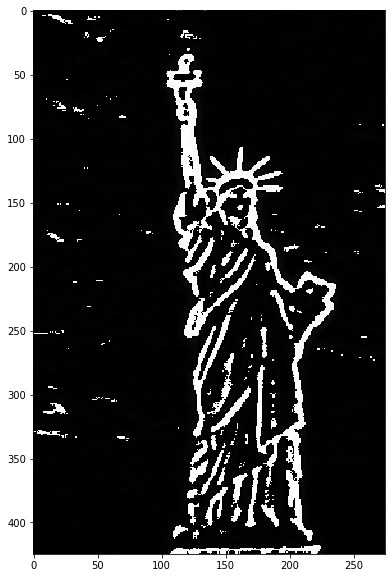

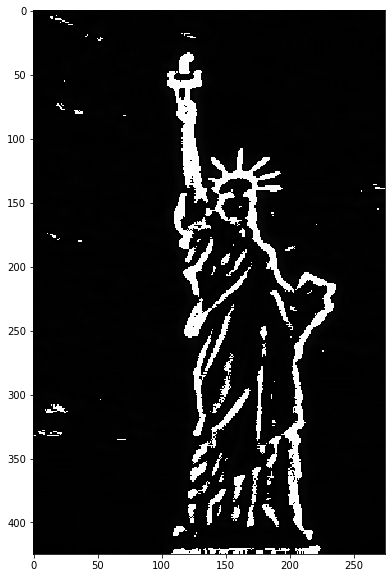

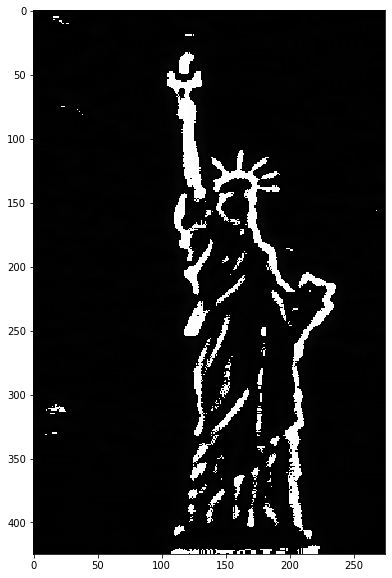

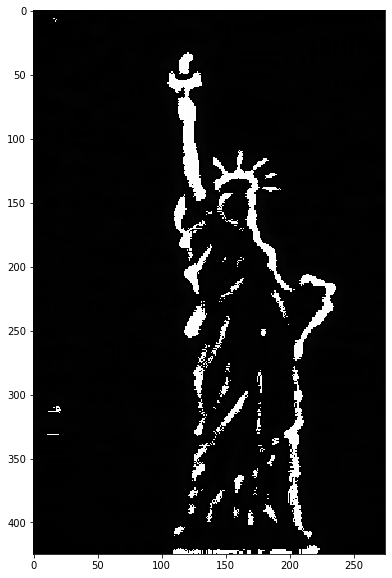

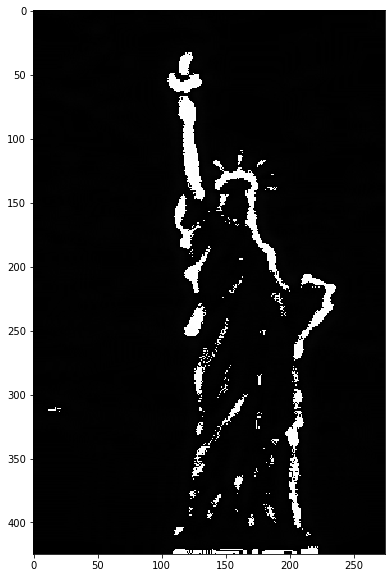

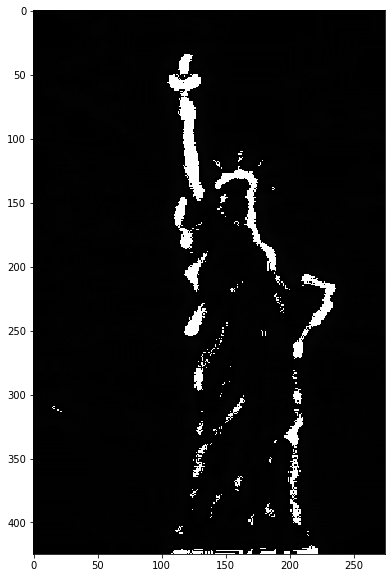

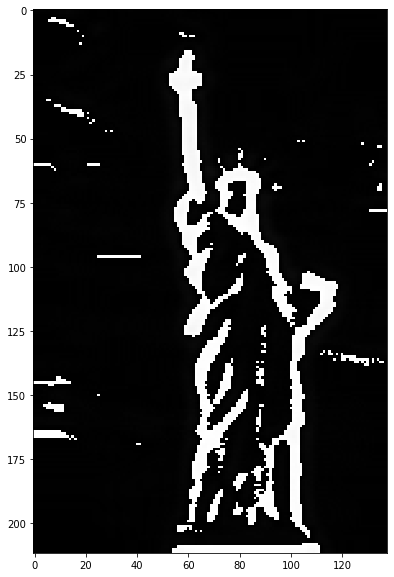

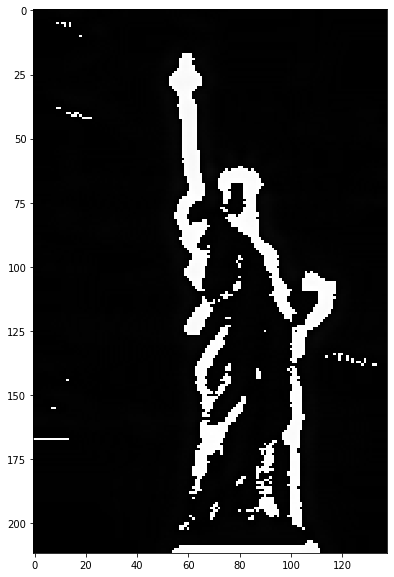

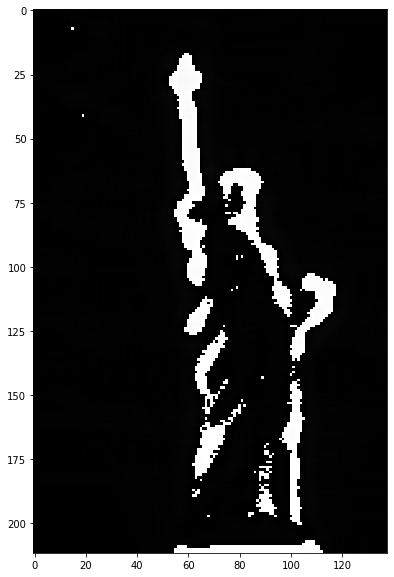

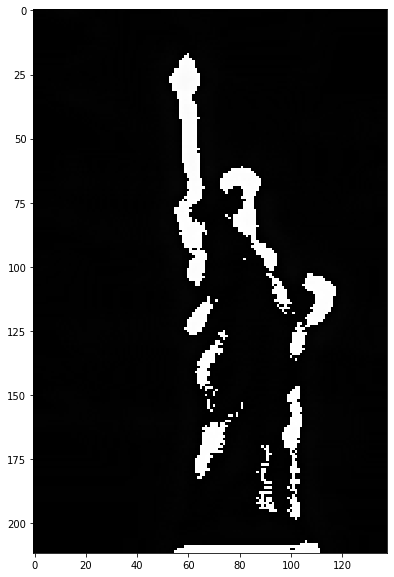

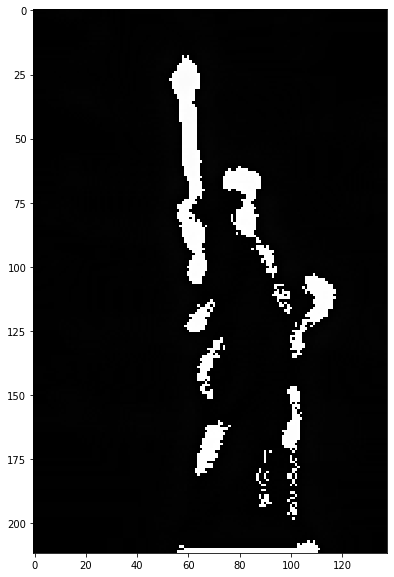

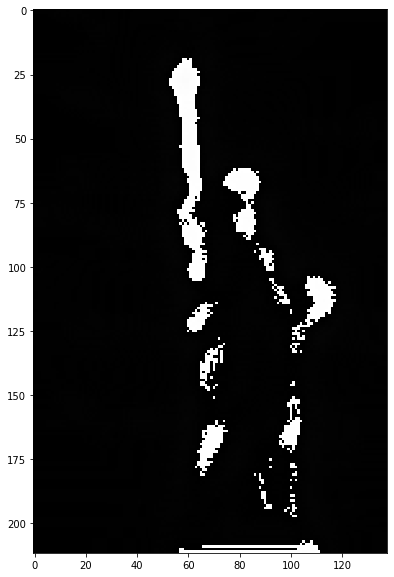

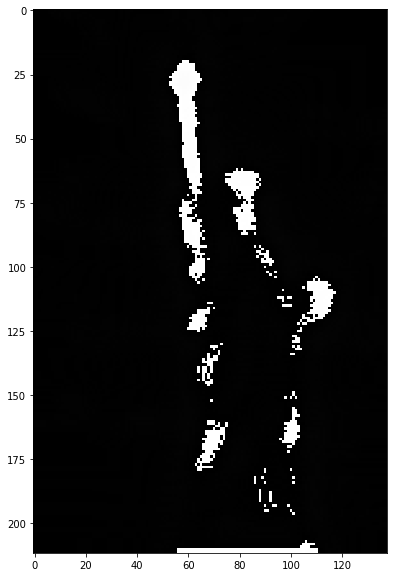

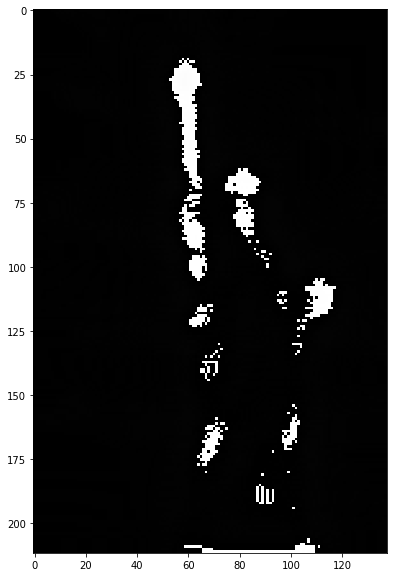

In [6]:
def create_octaves(img, sigma, num_octaves):
    
    gaussian_octaves = {}
    DoG_octaves = {}
    copy = img
    for k in np.arange(num_octaves)+1:
        gaussian_octaves[k] = []
        for i in range(9):
            gaussian_octaves[k].append(copy)
            copy = scipy.ndimage.gaussian_filter(copy, sigma=sigma)

        copy = zoom(copy, 0.5)
    
    for k in np.arange(num_octaves)+1:
        DoG_octaves[k] = []
        for i in np.arange(8):
            DoG_octaves[k].append(gaussian_octaves[k][i] - gaussian_octaves[k][i+1])

        
    return DoG_octaves

octaves = create_octaves(lady, 1.5,2)

for key in octaves.keys():
    for i in range(8):
        img = octaves[key][i]
        plt.figure(figsize=((15,10)))
        plt.imshow(img)
        plt.show()

In [7]:
def surround_pts(j,k,lyr):
    return [lyr[j-1][k-1],lyr[j-1][k],lyr[j-1][k+1],lyr[j][k-1],lyr[j][k+1],lyr[j+1][k-1],lyr[j+1][k],lyr[j+1][k+1]]

def check_point(j,k,previous_layer, current_layer, next_layer):
    this_point = current_layer[j][k]
    
    previous_pts = surround_pts(j,k,previous_layer)
    previous_pts.append(previous_layer[j][k])
    
    current_pts = surround_pts(j,k, current_layer)
    
    next_pts = surround_pts(j,k, next_layer)
    next_pts.append(next_layer[j][k])
    
    all_points = previous_pts + current_pts + next_pts
    
    for point in all_points:
        if this_point <= point:
            return False
        
    return True

def find_interest_points(octave):
    interest_points = {}
    m,n = octave[0].shape
    for i in np.arange(6)+1:
        previous_layer = octave[i-1]
        current_layer = octave[i]
        next_layer = octave[i+1]
        
        for j in np.arange(m-21)+10:
            for k in np.arange(n-21)+10:
                if check_point(j,k,previous_layer,current_layer,next_layer):
                    interest_points[(j,k)] = current_layer
                    
    return interest_points
                
    

In [24]:
for i in octaves:
    interest_points = find_interest_points(octaves[i])
    print("Number of interest points in octave {}: {}".format(i,len(interest_points.keys())))
    print("Number of interest points per layer in this octave: {:.2f}".format(len(list(interest_points.keys()))/7))

Number of interest points in octave 1: 563
Number of interest points per layer in this octave: 80.43
Number of interest points in octave 2: 104
Number of interest points per layer in this octave: 14.86


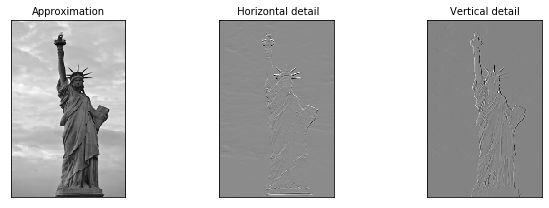

In [46]:
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail']#, 'Diagonal detail']
(cA, (cH, cV,_)) = pywt.dwt2(lady, 'haar')

fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cA, cH, cV]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()